In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [6]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude

Some arbitrary points, with a cubic curve passing through them.



In [3]:
pts = map p2 [(0,0), (1,1), (2,1), (3,0), (3.5,0)]

spline :: Located (Trail V2 Double)
spline = cubicSpline False pts

Computing tangent and normal vectors at a particular point on the curve.



In [4]:
param = 0.45 -- parameter on the curve where the tangent and normal are drawn
pt = atParam spline param
tangentVector = tangentAtParam spline param
normalVector = normalAtParam spline param

We can draw the tangent and normal vectors with lines of twice their length,
with a square in between them to denote the right angle.



In [7]:
symmetricLine v = fromOffsets [2 *^ v] # center
tangentLine = symmetricLine tangentVector
normalLine = symmetricLine normalVector

rightAngleSquare = square 0.1 # alignBL # rotate (signedAngleBetween tangentVector unitX)

Putting it all together, with some labels.



In [8]:
example :: Diagram B
example = frame 0.5 $
  strokeLocTrail spline
  <> mconcat
     [ tangentLine
     , baselineText "tangent" # translate tangentVector
     , normalLine
     , topLeftText "normal" # translate normalVector
     , rightAngleSquare
     ] # moveTo pt # fontSize large

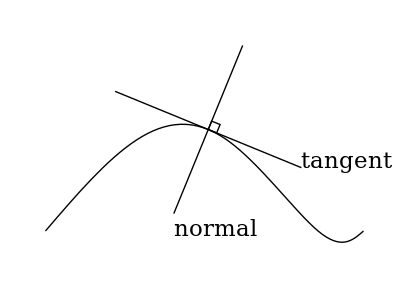

In [9]:
diagram example